In [8]:
# Auto-reload internal modules
%load_ext autoreload
%autoreload 2

# External modules
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

# Internal modules
from cosmotd.domain_walls import run_domain_wall_simulation
from cosmotd.cosmic_strings import run_cosmic_string_simulation
from cosmotd.charged_domain_walls import run_charged_domain_wall_simulation
from cosmotd.pentavac import run_pentavac_simulation
from cosmotd.single_axion import run_single_axion_simulation
from cosmotd.companion_axion import run_companion_axion_simulation
from cosmotd.plot import *
from cosmotd.parameters import *

from cosmotd.cosmic_string_algorithms import find_cosmic_strings_brute_force_small

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Size of simulation grid
N = 50
# Model parameters
beta = 1
eta_phi = 1
eta_sigma = np.sqrt(3) / 2
lam_phi = 5
lam_sigma = 2
charge_density = 0.1
# RNG seed
seed = 23213241
# Run time
run_time = None
# Plotter
plotter = MplNotebookPlotter

100%|██████████| 1501/1501 [00:20<00:00, 74.33it/s]


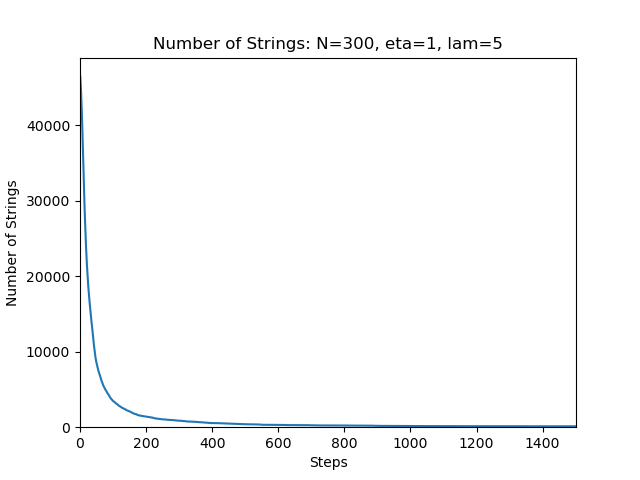

In [22]:
def plot_cosmic_string_number_standard(N, dx, dt, alpha, eta, era, lam, run_time, seed):
    # Count the number of cosmic strings
    run_time = int(0.5 * N * dx / dt)
    simulation_end = run_time + 1
    simulation = run_cosmic_string_simulation(N, dx, dt, alpha, eta, era, lam, run_time, seed)
    num_strings = np.empty(simulation_end)
    num_strings.fill(np.nan)

    for idx, (phi_real_field, phi_imaginary_field) in tqdm(enumerate(simulation), total=simulation_end):
        phi_real = phi_real_field.value
        phi_imaginary = phi_imaginary_field.value
        strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
        count = np.count_nonzero(strings)
        num_strings[idx] = count


    %matplotlib widget
    fig, ax = plt.subplots()
    ax.plot(range(simulation_end), num_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Number of Strings: {N=}, eta={eta}, lam={lam}")
    ax.set_xlim(0, simulation_end)
    ax.set_ylim(bottom=0)
plot_cosmic_string_number_standard(300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam_phi, run_time, None)

100%|██████████| 251/251 [00:00<00:00, 1555.81it/s]


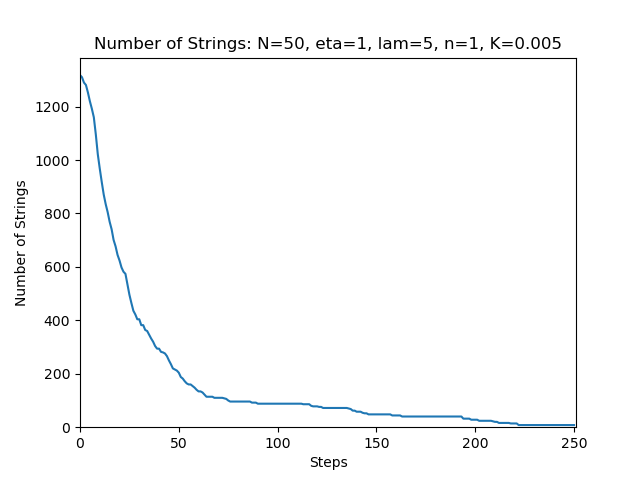

In [75]:
def plot_cosmic_string_number_single_axion(N, dx, dt, alpha, eta, era, lam, n, K, turn_on_time, run_time, seed):
    # Count the number of cosmic strings
    run_time = int(0.5 * N * dx / dt)
    simulation_end = run_time + 1
    simulation = run_single_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, K, turn_on_time, run_time, seed)
    num_strings = np.empty(simulation_end)
    num_strings.fill(np.nan)

    for idx, (phi_real_field, phi_imaginary_field) in tqdm(enumerate(simulation), total=simulation_end):
        phi_real = phi_real_field.value
        phi_imaginary = phi_imaginary_field.value
        strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
        count = np.count_nonzero(strings)
        num_strings[idx] = count


    %matplotlib widget
    fig, ax = plt.subplots()
    ax.plot(range(simulation_end), num_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Number of Strings: {N=}, {eta=}, {lam=}, {n=}, {K=}")
    ax.set_xlim(0, simulation_end)
    ax.set_ylim(bottom=0)
plot_cosmic_string_number_single_axion(N, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam_phi, 1, 0.001 * lam_phi, 100, run_time, None)

100%|██████████| 751/751 [00:15<00:00, 47.34it/s]


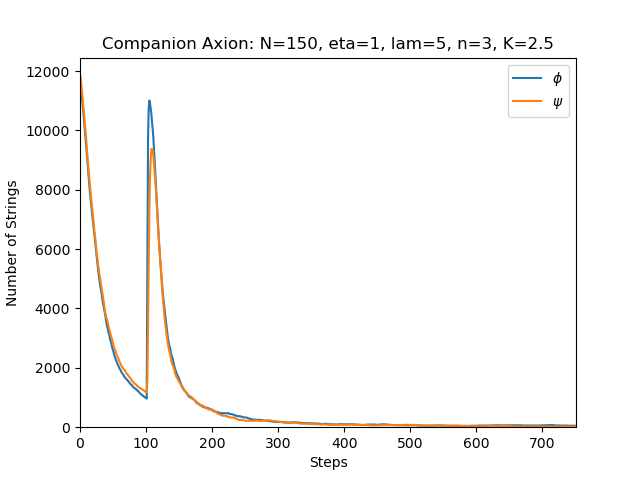

In [35]:
def plot_cosmic_string_number_companion_axion(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed):
    # Count the number of cosmic strings
    run_time = int(0.5 * N * dx / dt)
    simulation_end = run_time + 1
    simulation = run_companion_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed)
    num_phi_strings = np.empty(simulation_end)
    num_phi_strings.fill(np.nan)
    num_psi_strings = np.empty(simulation_end)
    num_psi_strings.fill(np.nan)

    for idx, (phi_real_field, phi_imaginary_field, psi_real_field, psi_imaginary_field) in tqdm(enumerate(simulation), total=simulation_end):
        phi_real = phi_real_field.value
        phi_imaginary = phi_imaginary_field.value
        phi_strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
        phi_count = np.count_nonzero(phi_strings)
        num_phi_strings[idx] = phi_count
        
        psi_real = psi_real_field.value
        psi_imaginary = psi_imaginary_field.value
        psi_strings = find_cosmic_strings_brute_force_small(psi_real, psi_imaginary)
        psi_count = np.count_nonzero(psi_strings)
        num_psi_strings[idx] = psi_count


    %matplotlib widget
    fig, ax = plt.subplots()
    ax.plot(range(simulation_end), num_phi_strings)
    ax.plot(range(simulation_end), num_psi_strings)
    ax.legend([r"$\phi$", r"$\psi$"])
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Companion Axion: {N=}, {eta=}, {lam=}, {n=}, {K=}")
    ax.set_xlim(0, simulation_end)
    ax.set_ylim(bottom=0)
# Companion axion
lam = 5
n = 3
n_prime = 1 / 2
m = 13 / 2
m_prime = 3 / 2
K = 0.5 * lam
kappa = 0.04
turn_on_time = 100
plot_cosmic_string_number_companion_axion(150, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, n, n_prime, m, m_prime, K, kappa, 100, run_time, seed)

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


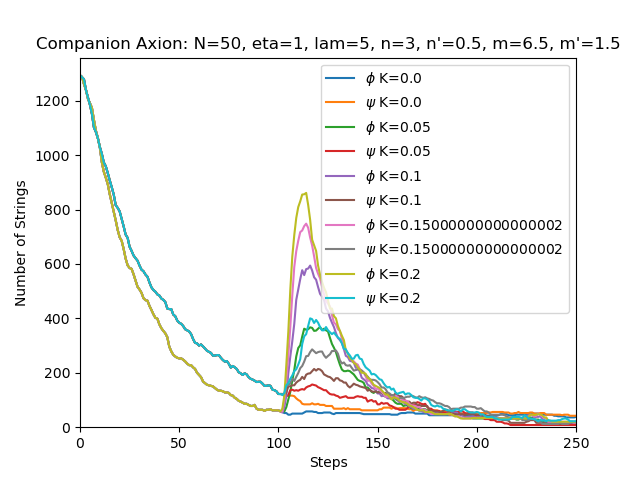

In [79]:
def plot_cosmic_string_number_companion_axion_K(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, kappa, turn_on_time, run_time, seed, num_k):
    run_time = int(0.5 * N * dx / dt)
    k_values = np.linspace(0, 0.2, num_k)
    
    
    %matplotlib widget
    fig, ax = plt.subplots()
    
    for _, K in tqdm(enumerate(k_values), total=num_k):
        num_phi_strings = np.empty(run_time + 1)
        num_phi_strings.fill(np.nan)
        num_psi_strings = np.empty(run_time + 1)
        num_psi_strings.fill(np.nan)
        simulation = run_companion_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed)
        
        for idx, (phi_real_field, phi_imaginary_field, psi_real_field, psi_imaginary_field) in enumerate(simulation):
            phi_real = phi_real_field.value
            phi_imaginary = phi_imaginary_field.value
            phi_strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
            phi_count = np.count_nonzero(phi_strings)
            num_phi_strings[idx] = phi_count
            
            psi_real = psi_real_field.value
            psi_imaginary = psi_imaginary_field.value
            psi_strings = find_cosmic_strings_brute_force_small(psi_real, psi_imaginary)
            psi_count = np.count_nonzero(psi_strings)
            num_psi_strings[idx] = psi_count

        ax.plot(range(run_time+1), num_phi_strings)
        ax.plot(range(run_time+1), num_psi_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Companion Axion: {N=}, {eta=}, {lam=}, {n=}, n'={n_prime}, {m=}, m'={m_prime}")
    ax.set_xlim(0, run_time)
    ax.set_ylim(bottom=0)
    # Legend
    legend = []
    for K in k_values:
        legend.append(r"$\phi$" + f" K={K}")
        legend.append(r"$\psi$" + f" K={K}")
    ax.legend(legend)
# Companion axion
lam = 5
n = 3
n_prime = 1 / 2
m = 13 / 2
m_prime = 3 / 2
K = 0.5 * lam
kappa = 0.04
turn_on_time = 100
plot_cosmic_string_number_companion_axion_K(N, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, n, n_prime, m, m_prime, kappa, 100, run_time, seed, num_k=5)

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


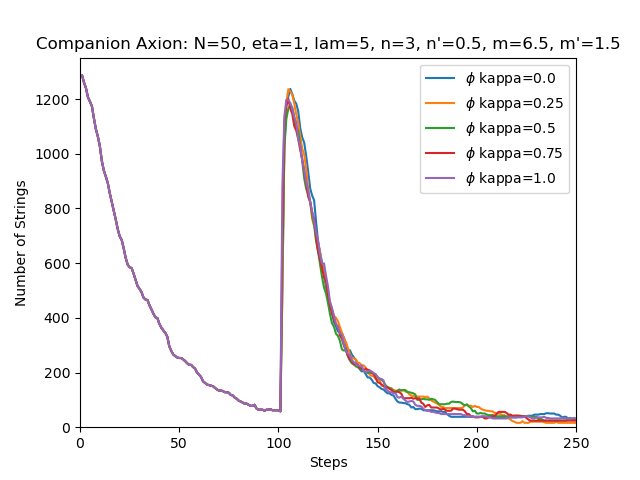

In [53]:
def plot_cosmic_string_number_companion_axion_kappa(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, turn_on_time, run_time, seed, num_kappa):
    run_time = int(0.5 * N * dx / dt)
    kappa_values = np.linspace(0, 1, num_kappa)
    
    
    %matplotlib widget
    fig, ax = plt.subplots()
    
    for _, kappa in tqdm(enumerate(kappa_values), total=num_kappa):
        num_phi_strings = np.empty(run_time + 1)
        num_phi_strings.fill(np.nan)
        num_psi_strings = np.empty(run_time + 1)
        num_psi_strings.fill(np.nan)
        simulation = run_companion_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed)
        
        for idx, (phi_real_field, phi_imaginary_field, psi_real_field, psi_imaginary_field) in enumerate(simulation):
            phi_real = phi_real_field.value
            phi_imaginary = phi_imaginary_field.value
            phi_strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
            phi_count = np.count_nonzero(phi_strings)
            num_phi_strings[idx] = phi_count
            
            psi_real = psi_real_field.value
            psi_imaginary = psi_imaginary_field.value
            psi_strings = find_cosmic_strings_brute_force_small(psi_real, psi_imaginary)
            psi_count = np.count_nonzero(psi_strings)
            num_psi_strings[idx] = psi_count

        ax.plot(range(run_time+1), num_phi_strings)
        # ax.plot(range(run_time+1), num_psi_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Companion Axion: {N=}, {eta=}, {lam=}, {n=}, n'={n_prime}, {m=}, m'={m_prime}")
    ax.set_xlim(0, run_time)
    ax.set_ylim(bottom=0)
    # Legend
    legend = []
    for K in kappa_values:
        legend.append(r"$\phi$" + f" kappa={K}")
        # legend.append(r"$\psi$" + f" kappa={K}")
    ax.legend(legend)
# Companion axion
lam = 5
n = 3
n_prime = 1 / 2
m = 13 / 2
m_prime = 3 / 2
K = 0.5 * lam
kappa = 0.04
turn_on_time = 100
plot_cosmic_string_number_companion_axion_kappa(N, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, n, n_prime, m, m_prime, K, 100, run_time, seed, num_kappa=5)

100%|██████████| 5/5 [00:22<00:00,  4.59s/it]


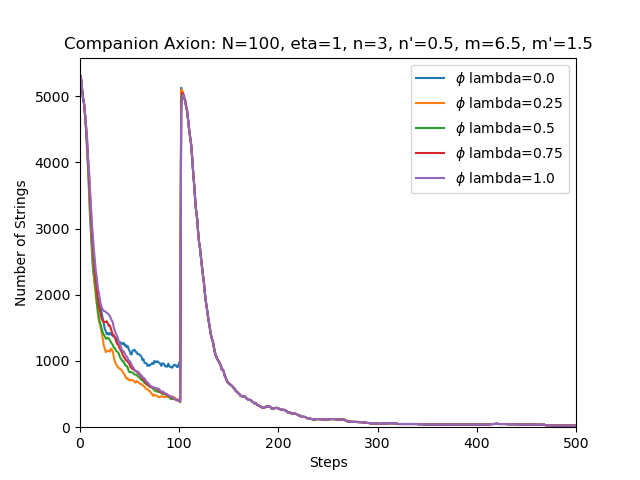

In [59]:
def plot_cosmic_string_number_companion_axion_lam(N, dx, dt, alpha, eta, era, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed, num_lam):
    run_time = int(0.5 * N * dx / dt)
    lam_values = np.linspace(0, 1, num_lam)
    
    %matplotlib widget
    fig, ax = plt.subplots()
    
    for _, lam in tqdm(enumerate(lam_values), total=num_lam):
        num_phi_strings = np.empty(run_time + 1)
        num_phi_strings.fill(np.nan)
        num_psi_strings = np.empty(run_time + 1)
        num_psi_strings.fill(np.nan)
        simulation = run_companion_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed)
        
        for idx, (phi_real_field, phi_imaginary_field, psi_real_field, psi_imaginary_field) in enumerate(simulation):
            phi_real = phi_real_field.value
            phi_imaginary = phi_imaginary_field.value
            phi_strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
            phi_count = np.count_nonzero(phi_strings)
            num_phi_strings[idx] = phi_count
            
            psi_real = psi_real_field.value
            psi_imaginary = psi_imaginary_field.value
            psi_strings = find_cosmic_strings_brute_force_small(psi_real, psi_imaginary)
            psi_count = np.count_nonzero(psi_strings)
            num_psi_strings[idx] = psi_count

        ax.plot(range(run_time+1), num_phi_strings)
        # ax.plot(range(run_time+1), num_psi_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Companion Axion: {N=}, {eta=}, {n=}, n'={n_prime}, {m=}, m'={m_prime}")
    ax.set_xlim(0, run_time)
    ax.set_ylim(bottom=0)
    # Legend
    legend = []
    for K in lam_values:
        legend.append(r"$\phi$" + f" lambda={K}")
        # legend.append(r"$\psi$" + f" lambda={K}")
    ax.legend(legend)
# Companion axion
lam = 5
n = 3
n_prime = 1 / 2
m = 13 / 2
m_prime = 3 / 2
K = 0.5 * lam
kappa = 0.04
turn_on_time = 100
plot_cosmic_string_number_companion_axion_lam(100, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, n, n_prime, m, m_prime, K, kappa, 100, run_time, seed, num_lam=5)

100%|██████████| 5/5 [00:22<00:00,  4.52s/it]


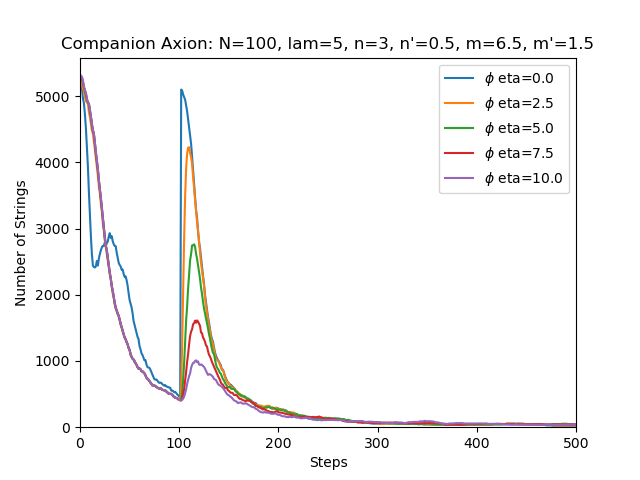

In [62]:
def plot_cosmic_string_number_companion_axion_eta(N, dx, dt, alpha, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed, num_eta):
    run_time = int(0.5 * N * dx / dt)
    eta_values = np.linspace(0, 10, num_eta)
    
    %matplotlib widget
    fig, ax = plt.subplots()
    
    for _, eta in tqdm(enumerate(eta_values), total=num_eta):
        num_phi_strings = np.empty(run_time + 1)
        num_phi_strings.fill(np.nan)
        num_psi_strings = np.empty(run_time + 1)
        num_psi_strings.fill(np.nan)
        simulation = run_companion_axion_simulation(N, dx, dt, alpha, eta, era, lam, n, n_prime, m, m_prime, K, kappa, turn_on_time, run_time, seed)
        
        for idx, (phi_real_field, phi_imaginary_field, psi_real_field, psi_imaginary_field) in enumerate(simulation):
            phi_real = phi_real_field.value
            phi_imaginary = phi_imaginary_field.value
            phi_strings = find_cosmic_strings_brute_force_small(phi_real, phi_imaginary)
            phi_count = np.count_nonzero(phi_strings)
            num_phi_strings[idx] = phi_count
            
            psi_real = psi_real_field.value
            psi_imaginary = psi_imaginary_field.value
            psi_strings = find_cosmic_strings_brute_force_small(psi_real, psi_imaginary)
            psi_count = np.count_nonzero(psi_strings)
            num_psi_strings[idx] = psi_count

        ax.plot(range(run_time+1), num_phi_strings)
        # ax.plot(range(run_time+1), num_psi_strings)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Number of Strings")
    ax.set_title(f"Companion Axion: {N=}, {lam=}, {n=}, n'={n_prime}, {m=}, m'={m_prime}")
    ax.set_xlim(0, run_time)
    ax.set_ylim(bottom=0)
    # Legend
    legend = []
    for K in eta_values:
        legend.append(r"$\phi$" + f" eta={K}")
        # legend.append(r"$\psi$" + f" eta={K}")
    ax.legend(legend)
# Companion axion
lam = 5
n = 3
n_prime = 1 / 2
m = 13 / 2
m_prime = 3 / 2
K = 0.5 * lam
kappa = 0.04
turn_on_time = 100
plot_cosmic_string_number_companion_axion_eta(100, DX, DT, ALPHA_2D, RADIATION_ERA, lam, n, n_prime, m, m_prime, K, kappa, 100, run_time, seed, num_eta=5)